# Sklearn

## sklearn.linear_model

In [15]:
import sklearn
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [4]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

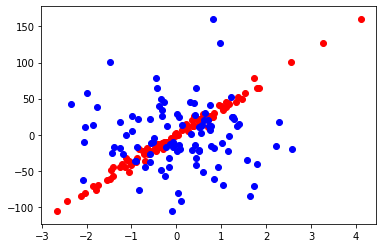

In [6]:
x_1 = [x[0] for x in data]
x_2 = [x[1] for x in data]
pylab.scatter(x_1, target, color = 'r')
pylab.scatter(x_2, target, color = 'b')

красненькие - информативный признак, синеньке - не информативный

In [7]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target,  
                                                                                     test_size = 0.3)

#### LinearRegression

In [8]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [9]:
print (test_labels)

[-24.77820218  12.67156468 -21.47606913 -21.48288019  11.06961035
 -32.92158843   4.45578287  12.47089016  -0.74051877 -12.98848753
 -13.99339669 -10.29545833  11.96165156  51.87072011 -45.27502383
 -22.33224966 -40.84204295  38.36241814 -76.75213382  11.74073026
  13.02656201 -71.3715844  -17.27897399  -4.38652971 -57.46293828
 -18.86438755  41.95683853 -16.65927231 -18.57607726 -10.06708677]


In [10]:
print (predictions)

[-25.10406287  14.80664788 -18.01258093 -24.76700886  28.14963764
 -33.68889221  10.5587645   19.69920698   2.36762159 -16.04205291
 -14.72133663 -10.27111488  13.54220337  51.82515561 -48.95623789
 -28.78684059 -48.23364706  43.90751335 -68.46456598  13.35345909
  19.09652058 -73.08006603 -12.87278148  -4.05619824 -54.4410473
 -17.17004379  46.77806315 -13.42755684 -25.70806618  -7.37489944]


In [25]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [28]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print ('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779696, std: 1.07371044928902


In [29]:
coef

array([38.07925837,  0.        ])

In [30]:
linear_regressor.coef_

array([38.49931155, -0.67678868])

In [ ]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

In [32]:
print ("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [33]:
print ("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))

y = 38.50*x1 + -0.68*x2 + 0.01


#### Lasso

In [34]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [35]:
lasso_scoring = model_selection.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print ('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.1544782466663985, std: 1.0170354384993352


In [36]:
print (lasso_regressor.coef_)

[37.85590742 -0.        ]


In [37]:
print ("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [38]:
print ("y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1]))

y = 37.86*x1 + -0.00*x2
